# Analysis of Accountability Labels

## Loading Data and Libraries

In [43]:
%matplotlib inline

import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_names = ["Isla Vista - All Excerpts - 1_2_2019.xlsx",
            "Marysville - All Excerpts - Final - 1_2_2019.xlsx",
            "Newtown - All Excerpts - 1-2-2019.xlsx"]

In [103]:
account_files_dict = {}
excerpts_dict = {}
for file_name in file_names:
    account_labels_dict = {}
    data = pd.read_excel(file_name, sheet_name='Dedoose Excerpts Export')
    data = data.dropna(axis=0)
    ex_col = list(data.columns)[1]
    excerpts = list(data[ex_col])
    excerpts_dict[file_name.split(' - ')[0]] = excerpts
    acc_labels = [colname for colname in list(data.columns) if ('ACCOUNT' in colname)]
    for acc_label in acc_labels:
        account_labels_dict[acc_label] = list(data[acc_label])
    account_files_dict[file_name] = account_labels_dict

## Comparison of Labels in Each Dataset

There are three files of news article excerpts, and the break down of accountability labels in each will be analyzed.

In [124]:
index = list(account_files_dict[file_name].keys())

In [130]:
account_counts_df = pd.DataFrame(index=index)
num_exs_lst = []
for file_name in account_files_dict.keys():
    #file_results = [len(account_files_dict[file_name][label_name])]
    num_exs = len(account_files_dict[file_name][label_name])
    num_exs_lst.append(num_exs)
    file_results = []
    for label_name in list(account_files_dict[file_name].keys()):        
        file_results.append(sum(account_files_dict[file_name][label_name])/num_exs)
    #file_results.append(len(account_files_dict[file_name][label_name]))
    event_name = file_name.split(' - ')[0]
    account_counts_df[event_name] = file_results


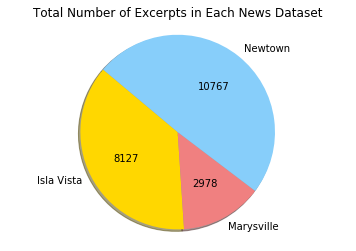

In [158]:
labels = list(account_counts_df.columns)
sizes = num_exs_lst
colors = ['gold', 'lightcoral', 'lightskyblue']

# Plot
plt.pie(sizes, labels=labels, colors=colors, 
        autopct = lambda p: '{:.0f}'.format(p * sum(num_exs_lst)/ 100), shadow=True, startangle=140)
#autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Total Number of Excerpts in Each News Dataset")
plt.axis('equal')
plt.savefig('total_number_excerpts.png')
plt.show()

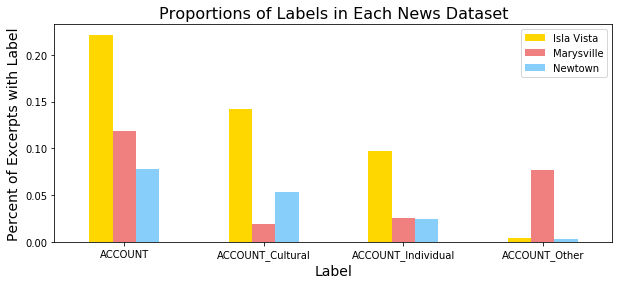

In [166]:
ax = account_counts_df.plot.bar(rot=0, figsize=(10,4),
                           color = colors, fontsize = 10)
ax.set_title( "Proportions of Labels in Each News Dataset", fontsize = 16)
ax.set_xlabel("Label", fontsize = 14)
_ = ax.set_ylabel("Percent of Excerpts with Label", fontsize = 14)
plt.savefig('label_proportions.png')

## Analysis of Multi-Class Labels

### Documents with only 'ACCOUNT' label

In [108]:
index = []
for file_name in account_files_dict.keys():
    index.extend([file_name.split(' - ')[0]+"_"+str(idx) 
                  for idx in range(pd.DataFrame(account_files_dict[file_name]).shape[0])])

In [109]:
full_labels_df = pd.concat([pd.DataFrame(account_files_dict[file_name]) 
                            for file_name in account_files_dict.keys()], ignore_index=True)
full_labels_df.index = index

In [121]:
account_idx = []
for idx, row in full_labels_df.iterrows():
    if list(row) == [1, 0, 0, 0]:
        file_excerpts = excerpts_dict[idx.split('_')[0]]
        excerpt = file_excerpts[int(idx.split('_')[1])]
        print("")
        print(idx+": \n"+excerpt)


Marysville_1149: 
A detective investigating the Marysville high-school shootings that left five teens dead says in court papers that the 
young gunmans texts turned dark the week before he opened fire, with references to his funeral and the message: Bang bang Im dead. Moments before Jaylen Fryberg, 15, shot his fellow students Oct. 24 in the Marysville-Pilchuck High School cafeteria, he texted more than a dozen relatives, describing what he wanted to wear at his funeral and who should get his personal possessions, the detectives search­warrant affidavit says. 
The boy asked relatives to apologize to the families of his friends who get caught up in the (expletive) tomorrow  referring to the day after the shooting. He also sent texts in the previous days to a female friend talking about his death and funeral. 

Marysville_1895: 
The shooter was a student at the school 30 miles north of Seattle, but Marysville Police Commander Robb Lamoureux said he could not provide more informa

### Multi-Labelled Documents

In [115]:
index = [label for label in list(full_labels_df.keys()) if '_' in label]
multiclass_df = pd.DataFrame(index=index)

In [116]:
for label_col in index:
    co_occur = []
    for label_row in index:   
        zlist=zip(full_labels_df[label_col], full_labels_df[label_row])
        co_occur.append(sum([tup == (1,1) for tup in list(zlist)]))

    multiclass_df[label_col] = co_occur

multiclass_df

,ACCOUNT_Cultural,ACCOUNT_Individual,ACCOUNT_Other
ACCOUNT_Cultural,1782,204,0
ACCOUNT_Individual,204,1124,7
ACCOUNT_Other,0,7,292


In [120]:
account_idx = []
for idx, row in full_labels_df.iterrows():
    if list(row) == [1, 0, 1, 1]:
        file_excerpts = excerpts_dict[idx.split('_')[0]]
        excerpt = file_excerpts[int(idx.split('_')[1])]
        print("")
        print(idx+": \n"+excerpt)


Isla Vista_7635: 
In that manifesto, he described his life story, frustration over not being able to find a girlfriend and his hatred of women, racial minorities 
and interracial couples. 

Marysville_727: 
There seemed to be no clues that might have prevented the school shooting in Marysville, Washington. Members of the close­knit Tulalip Tribes  said to be one of the most successful Native American tribes in the US  are reeling. 
Retrospect always seems to provide tragic clues that might have prevented a school shooting. Bullying. Trouble at home. An unusual 
fascination with guns or violent video games. More than ones share of typical teen angst. 

None of that appears to have been the case in Marysville, Wash., Friday morning when 14 year-old high school freshman Jaylen Fryberg 
walked into the cafeteria at Marysville-Pilchuck High School and without a word shot five fellow students  killing one and then himself. 

Newtown_2359: 
 Although suicide
terrorists may share the same